In [1]:
# 4.2 Exercise: Probability Mass Functions and Cumulative Distribution Functions

In [2]:
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

## Exercises Page 35-36: 3-1

## Exercises

**Exercise:** Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable `numkdhh` to construct the actual distribution for the number of children under 18 in the respondents' households.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means.

In [6]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

In [7]:
import nsfg
import first
import thinkstats2
import thinkplot

In [8]:
resp = nsfg.ReadFemResp()

In [9]:
# Read first 5 records
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


In [10]:
# Inspect column names
resp.columns

Index(['caseid', 'rscrinf', 'rdormres', 'rostscrn', 'rscreenhisp',
       'rscreenrace', 'age_a', 'age_r', 'cmbirth', 'agescrn',
       ...
       'pubassis_i', 'basewgt', 'adj_mod_basewgt', 'finalwgt', 'secu_r',
       'sest', 'cmintvw', 'cmlstyr', 'screentime', 'intvlngth'],
      dtype='object', length=3087)

In [11]:
# Use the NSFG respondent variable numkdhh to construct the actual distribution for the number of children under 18 in the respondents' households.

pmf = thinkstats2.Pmf(resp.numkdhh, label="numkdhh")

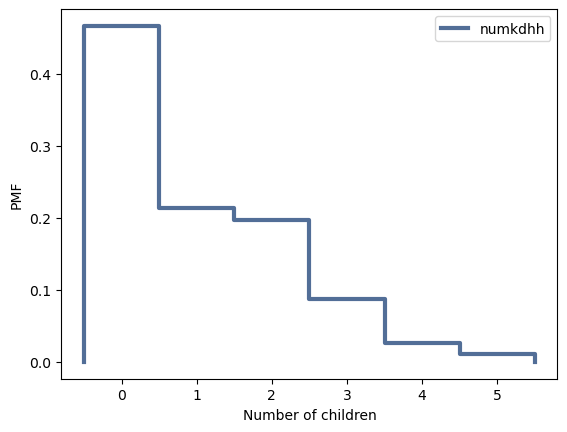

In [12]:
# Solution

thinkplot.Pmf(pmf)
thinkplot.Config(xlabel="Number of children", ylabel="PMF")

In [13]:
#This function computes the biased PMF we would get if we surveyed students and asked about the size of the classes they are in.

In [14]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)

    new_pmf.Normalize()
    return new_pmf

In [15]:
# Solution

biased = BiasPmf(pmf, label="biased")

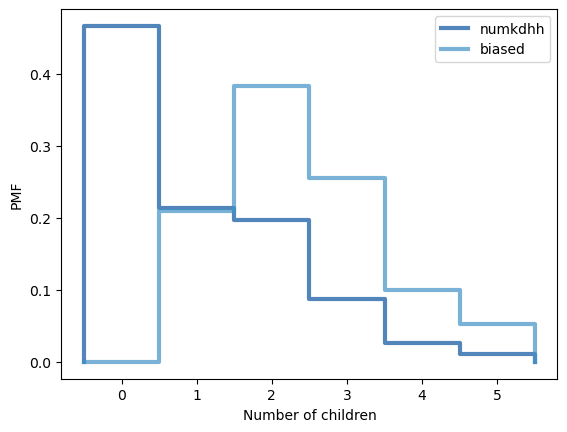

In [16]:
# Plot the actual and biased distributions.

thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased])
thinkplot.Config(xlabel="Number of children", ylabel="PMF")

In [17]:
# compute means for actual number of children

pmf.Mean()

1.024205155043831

In [18]:
pmf.Var()

1.4128643263531195

In [19]:
# compute the mean for biased number of children

biased.Mean()

2.403679100664282

## Exercise Page 36: 3-2

**In Chapter 3 we computed the mean of a sample by adding up
the elements and dividing by n.  If you are given a PMF, you can
still compute the mean, but the process is slightly different:
%
$$ \bar x = \sum_i p_i~x_i $$
%
where the $x_i$ are the unique values in the PMF and $p_i=PMF(x_i)$.
Similarly, you can compute variance like this:
%
$$ S^2 = \sum_i p_i~(x_i - \bar x)^2 $$
% 
Write functions called `PmfMean` and `PmfVar` that take a
Pmf object and compute the mean and variance.  To test these methods,
check that they are consistent with the methods `Mean` and `Var`
provided by `Pmf`.

In [22]:
def PmfMean(pmf):
    """Computes the mean of a PMF.
    Returns:
        float mean
    """
    return sum(p * x for x, p in pmf.Items())

In [23]:
def PmfVar(pmf, mu=None):
    """Computes the variance of a PMF.
    mu: the point around which the variance is computed;
            if omitted, computes the mean
    returns: float variance
    """
    if mu is None:
        mu = PmfMean(pmf)

    return sum(p * (x - mu) ** 2 for x, p in pmf.Items())

In [24]:
PmfMean(pmf)

1.024205155043831

In [25]:
PmfVar(pmf, mu=None)

1.4128643263531195

## Exercise Page 47: 4-1

In [27]:
# Exercise: Page 47: 4-1 
# How much did you weigh at birth? If you do not know, call your mother or someone else who knows.
# Using the NSFG data (all live births), compute the distribution of birth weights and use it to find your percentile rank.
# If you were a first baby, find your percentile rank in the distribution for first babies. Otherwise use the distribution for others. 
# If you are in the 90 th percentile or higher, call your mother back and apologize.

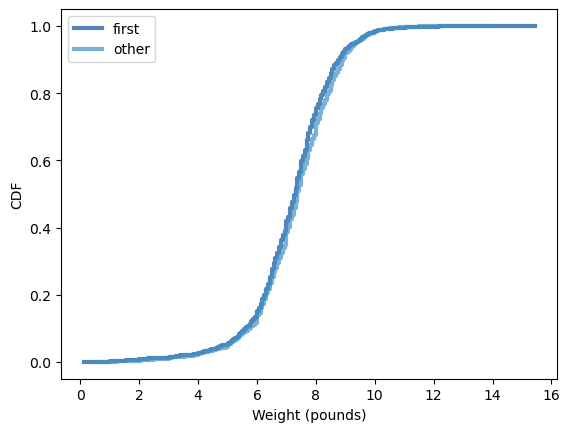

In [28]:
import first
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")
live, firsts, others = first.MakeFrames()
first_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label='first')
other_cdf = thinkstats2.Cdf(others.totalwgt_lb, label='other')


# Plot the distribution of the birth weights
thinkplot.PrePlot(2)
thinkplot.Cdfs([first_cdf, other_cdf])
thinkplot.Config(xlabel='Weight (pounds)', ylabel='CDF')

In [29]:
# In this example, we can see that first babies are slightly, but consistently, lighter than others.

# We can use the CDF of birth weight to compute percentile-based statistics.

In [30]:
# Calculate the percentile rank from cdf of first babies on birth weight criteria

first_cdf.PercentileRank(8.5)

85.90419436167774

In [31]:
# Calculate the percentile rank from cdf of other babies on birth weight criteria

other_cdf.PercentileRank(8.5)

82.35294117647058

In [32]:
# First babies are slightly lighter throuout the distribution

## Exercise Page 48: 4-2

In [34]:
## Exercise: Page 48: 4-2** The numbers generated by `numpy.random.random` are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.

# Generate 1000 numbers from `numpy.random.random` and plot their PMF.  What goes wrong?

# Now plot the CDF. Is the distribution uniform?

In [35]:
import numpy as np

In [36]:
# Generating 1000 random numbers from numpy.random.random

t = np.random.random(1000)

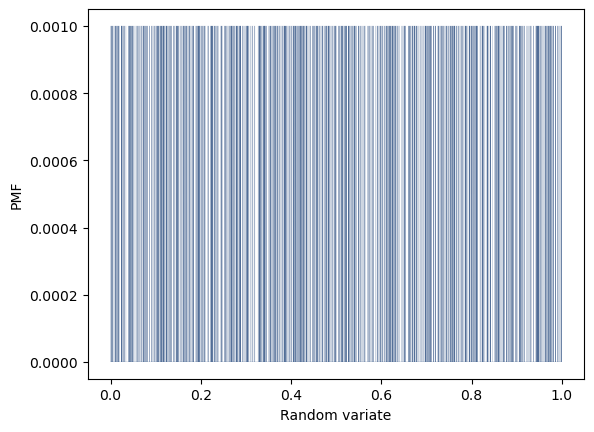

In [37]:
# plot PMF

pmf = thinkstats2.Pmf(t)
thinkplot.Pmf(pmf, linewidth=0.1)
thinkplot.Config(xlabel='Random variate', ylabel='PMF')

In [38]:
# PMF plot is hard to interpret from the visualization.

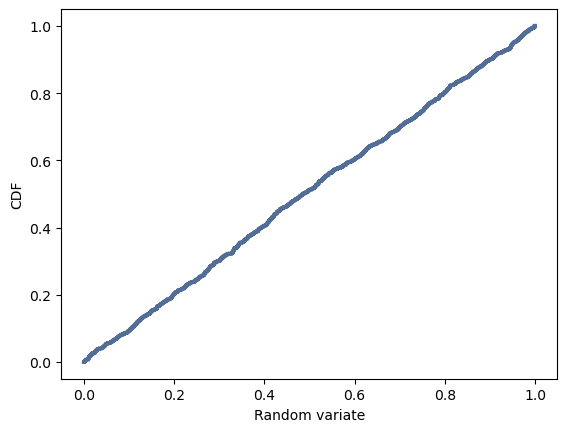

In [39]:
# plot the CDF

cdf = thinkstats2.Cdf(t)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Random variate', ylabel='CDF')

In [40]:
# The CDF approximately is a straight line , which means that the distribution is uniform.